# CPSC 330 hw2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/docs/homework_instructions.md). 

Additional note: data you download for use in this assignment **should not be pushed to your repository**. You will lose marks for pushing datasets to your repository.

### Getting familiar with the *fit* and *predict* paradigm. 

The idea of a machine learning algorithm is to *fit* the best model on the given training data (which is in the form of feature vectors and their targets) and then using this model to *predict* targets for new examples (represented with feature vectors.) Below we show an example of using these paradigms with a toy dataset. The goal is to predict fruit type given fruit's diameter and whether or not it is sweet. (Note: this is a very silly and contrived example, since if you've already taken a bite to see if it's sweet then you probably already know what type of fruit you are dealing with!)

In [2]:
toy_data = {
    # Features
    'is_sweet': [0, 0, 1, 1, 0, 1, 0],
    'diameter': [3, 3, 1, 1, 3, 1, 4],
    # Target
    'target': ['Apple', 'Apple', 'Grape', 'Grape', 'Lemon', 'Grape', 'Apple']
}

df = pd.DataFrame(toy_data)
df

,is_sweet,diameter,target
0,0,3,Apple
1,0,3,Apple
2,1,1,Grape
3,1,1,Grape
4,0,3,Lemon
5,1,1,Grape
6,0,4,Apple


### Fit a decision tree model using sklearn 

In [3]:
# import the tree module of sklearn
from sklearn import tree 

# instantiate a class of the DecisionTreeClassifier
model = tree.DecisionTreeClassifier()

# prepare data for model fitting
X = df[['is_sweet','diameter']]
y = df['target']

In [4]:
# fit the model to the data. The semicolon at the end is used to suppress displaying the output of model.fit
model.fit(X, y);

### Predict using the model

In [5]:
# we can use the .predict method of our model class to make predictions
predictions = model.predict(X)
predictions

array(['Apple', 'Apple', 'Grape', 'Grape', 'Apple', 'Grape', 'Apple'],
      dtype=object)

Since we know the true fruit identities, we can compare the predictions of our tree model to the true values.

In [6]:
df['prediction'] = predictions
df

,is_sweet,diameter,target,prediction
0,0,3,Apple,Apple
1,0,3,Apple,Apple
2,1,1,Grape,Grape
3,1,1,Grape,Grape
4,0,3,Lemon,Apple
5,1,1,Grape,Grape
6,0,4,Apple,Apple


Notice that the model made an _error_ on example with index 4, which is a **Lemon** but was predicted to be an **Apple**.

### Visualize the trained decision tree using the `graphviz` package

We will be using the [graphviz](https://graphviz.readthedocs.io/en/stable/manual.html) package to visualize the trained decision tree model. It may be somewhat annoying to install graphviz on some systems. Therefore, you are not required to install graphviz and run the code below; instead, you can simply observe the output shown below. Having said that, you are encouraged to install graphviz and actually run the code! It was fairly painless to install on my Mac. 

Mac or Linux users: You will have to install the package using

       conda install python-graphviz

and/or (possibly both) 

       pip install python-graphviz

Windows users: You might have to install both the [software](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) and the package. 

In [7]:
import graphviz

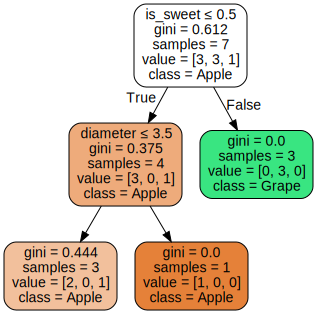

In [8]:
# define a function to plot our model (hint: you'll use this function later too)
def save_and_show_decision_tree(model, 
                                class_names,
                                feature_names,
                                save_file_prefix = 'test'):
    """
    Saves the decision tree model as a pdf and shows how the data is split and 
    classified

    Parameters
    ----------
    model: sklearn.tree.DecisionTreeClassifier
        The sklearn decision tree
    class_names : list
        The names of all the possible classifications
    feature_names : list
        The names of all the features
    save_file_prefix: str
        The name you wish to save the file

    Returns
    -------
    graphviz.files.Source
        The decision tree graph
    """
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=feature_names,  
                             class_names=class_names,  
                             filled=True, rounded=True,  
                             special_characters=True)  

    graph = graphviz.Source(dot_data) 
#     graph.render(save_file_prefix) 
    return graph

graph = save_and_show_decision_tree(model,
                                    class_names = ['Apple', 'Grape', 'Lemon'],
                                    feature_names = ['is_sweet','diameter'])
graph

## Exercise 1: Interpreting the decision tree <a name="1"></a>

#### 1(a)
rubric={points:3}

For each split in thie decision tree, briefly describe the splitting criterion and what data goes on each side of the split.

### Descriptions

1) is_sweet ≤ 0.5: 
    - criterion: if sweet is smaller or equal to 0.5; True: Classifies as Apple;False: Classifies as Grapes
    
Then for the true cases, aka. class = Apples:
2) diameter ≤ 3.5:
    - criterion: if the diameter of the object is <= 3.5; True: Classifies as Apple;False: Classifies as Apples


#### 1(b)
rubric={points:2}

Discuss the predictions on the training data. Why is the example `is_sweet` = 0 and `diameter` = 3 classified as *Apple* even though in the training data its target is *Lemon*? 

Because the decision tree decided that predicting only Apples and Grapes with a max_depth of 2 will result in highest prediction score, therefore no Lemon is predicted at all.

 ## Exercise 2: Exploratory Data Analysis <a name="2"></a>
 
 
For the rest of the assignment you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song or not. See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). The question we will focus on is what kinds of songs the user likes.

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file, rename it to `spotify.csv`, and move it to the same directory as this notebook.

#### 2(a) 
rubric={points:1}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [9]:
spotify_df = pd.read_csv("spotify.csv", index_col = 0)
spotify_df

FileNotFoundError: [Errno 2] File b'spotify.csv' does not exist: b'spotify.csv'

#### 2(b)
rubric={points:2}

Show some summary statistics of each feature using the `describe` method. Which feature has the smallest range (max-min)? Note that `describe` returns another DataFrame.

In [64]:
feature_stats = spotify_df.describe()
# get the feature that has the smallest (max-min)
f_range = feature_stats.loc[["max", "min"]]
print("{} has the smallest range".format((f_range.loc["max"] - f_range.loc["min"]).idxmin()))

speechiness has the smallest range


#### 2(c) 
rubric={points:4}

Produce histograms for the following features (in order) that show the distribution of the feature values, **separated for positive and negative target values**  (it should look something vaguely like [this](https://i.stack.imgur.com/acUlv.png)). As a reminder, the target class represents whether the user liked the song (1) or not (0).

- danceability
- tempo
- instrumentalness
- valence

Note: To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, you should use a `for` loop for your plotting, rather than repeating the plotting code 4 times.

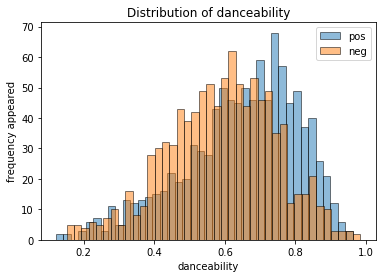

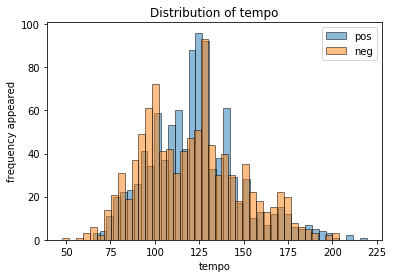

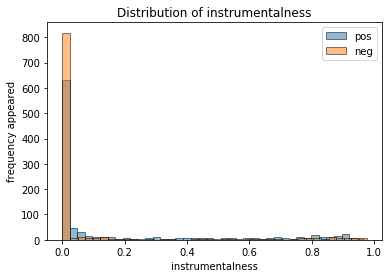

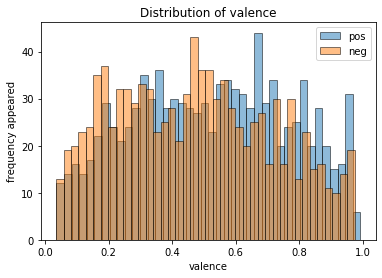

In [65]:
features = ["danceability", "tempo", "instrumentalness", "valence"]
# pos = spotify_df.query("target > 0.5")['danceability']
# neg = spotify_df.query("target < 0.5")['danceability']
# plt.hist(pos, n_bins, label = "pos", alpha = 0.5, edgecolor='black')
# plt.hist(neg, n_bins, label = "neg", alpha = 0.5, edgecolor='black')

# plt.legend(loc='upper right')
# plt.show()
x=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
y=[[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]]
for i in range(len(x)):
    pos = spotify_df.query("target > 0.5")[features[i]]
    neg = spotify_df.query("target < 0.5")[features[i]]
    plt.hist(pos, 40, label = "pos", alpha = 0.5, edgecolor='black')
    plt.hist(neg, 40, label = "neg", alpha = 0.5, edgecolor='black')
    plt.xlabel(features[i])
    plt.ylabel("frequency appeared")
    plt.title("Distribution of " + features[i])
    plt.legend(loc='upper right')
    plt.show()


#### 2(d)
rubric={points:3}

Let's say you had to make a decision tree, _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split and what class you would predict in the two cases.

instrumentalness <= 0.005; if true, classify as 1, if false classify as 0

#### 2(e)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are completely identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



It will give you a 50% 50% split, which is not very useful.

#### 2(f) 
rubric={points:2}

- Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

1) Yes of course. Intuitively, if a user likes an artist, then they are more likely to like their songs.

2) It will be hard to design the decision tree split condition, as those features are not continous numbers or k-nary categorical with a constant k.

## Exercise 3: Using sklearn to build a decision tree classifier <a name="3"></a>

#### 3(a) Fitting a  `DecisionTreeClassifier`  
rubric={points:3}

- Create `X` and `y` from the Spotify dataset. Skip the `song_title` and `artist` features for now. 
- Split the spotify dataset into a 80% train and 20% test using `sklearn.model_selection.train_test_split`.
- Fit a `DecisionTreeClassifier` on the train set.

In [66]:
# Create X and y from the Spotify dataset. Skip the song_title and artist features for now.
X = spotify_df.drop(columns = ["song_title", "artist", "target"])
y = spotify_df[["target"]]

# Split the spotify dataset into a 80% train and 20% test using sklearn.model_selection.train_test_split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size = 0.80)

# Fit a DecisionTreeClassifier on the train set.
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### 3(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train` and `X_test`. Are these predictions accurate? That is, do they match with the corresponding classes in `y_train` and `y_test`?  

In [67]:
print("They are accurate and they both match.")
y_train.iloc[0] == model.predict(X_train)[0],y_test.iloc[0] == model.predict(X_test)[0]

They are accurate and they both match.


(target    True
 Name: 376, dtype: bool, target    True
 Name: 983, dtype: bool)

#### 3(c) 
rubric={points:2}

Use the `score` method to compute the training accuracy and testing accuracy of your model. Display the results to 3 decimal places. ([Here](https://realpython.com/python-f-strings/) is an article on how to format the number of decimal places. Use `.3f` to get a float to 3 decimal places.)

In [68]:
train_score = model.score(X_train, y_train)
print("training set prediction score is: {}".format('%.3f'%train_score))
test_score = model.score(X_test, y_test)
print("testing set prediction score is: {}".format('%.3f'%test_score))

training set prediction score is: 0.998
testing set prediction score is: 0.688


#### 3(d)
rubric={points:1}

Do you see a difference in the train and test accuracies? Discuss the results. 

Yes, we do.
The training sets have a higher prediction score as the training was done using the same sets, the algorithm will try its best to achive 100% accuracy on the known results. On the other hand, the test sets targets are unknown to the model, thus has a lower prediction score.


## Exercise 4: Hyperparameters <a name="4"></a>
rubric={points:10}

In this exercise, you'll experiment with different hyperparameters of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

1. Split the spotify dataset into a 80% train and 20% test subset using `sklearn.model_selection.train_test_split()`.
2. Explore the `max_depth` hyperparameter. Train decision tree models with different values of `max_depth` (at least 10 different values in the range 1 to 25) on the training data.
3. For each `max_depth`, find the accuracy of the model on the train subset and the test subset.
4. Make a plot with the depth of the decision tree on the *x*-axis and the accuracy on the train and test sets on the *y*-axis.
5. Discuss how changing the `max_depth` hyperparameter affects the training and test accuracy. From these results, what depth would you pick as the optimal depth? Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., spotify datasets for other users)?

The accuracy increases with the max_depth up until max_depth = 12, then the accuracy remain fairly consistent after despite the increase in depth.I would choose max_depth = 12 for an optimal depth.This could be generalized for other spotify datasets, considering the sample size is pretty large


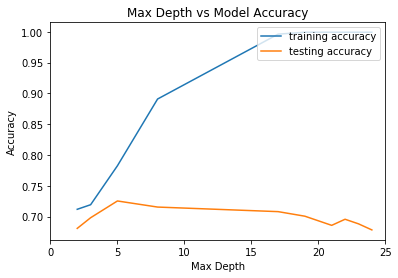

In [69]:
# Create X and y from the Spotify dataset. Skip the song_title and artist features for now.
X = spotify_df.drop(columns = ["song_title", "artist", "target"])
y = spotify_df[["target"]]

# Split the spotify dataset into a 80% train and 20% test using sklearn.model_selection.train_test_split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size = 0.80)


def n_deepTreeAccuracy(max_depth):
    '''
    call DecisionTreeClassifier() with a customized max_depth and 
    1) find out accuracy of the model on the used training set and testing set
    
    Parameter: max_depth
    -------------------------
    Returns:
    (training_accuracy, testing_accuray)
    '''
    model = tree.DecisionTreeClassifier(max_depth = max_depth)
    model.fit(X_train, y_train)
    training_accuracy = model.score(X_train,y_train)
    testing_accuracy = model.score(X_test,y_test)
    return[training_accuracy, testing_accuracy]

randos = np.random.choice(range(1,25),10,replace = False)
acrs = np.zeros((10,2))
for i in range(len(randos)):
    acrs[i] = n_deepTreeAccuracy(randos[i])


train_x, train_y = zip(*sorted(zip(randos, acrs[:,0]))) 
test_x, test_y = zip(*sorted(zip(randos, acrs[:,1])))
# make a plot
plt.plot(train_x, train_y,label = "training accuracy")
plt.plot(test_x, test_y, label = "testing accuracy")
plt.legend(loc='upper right')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Max Depth vs Model Accuracy")
plt.xlim(0,25)

print("The accuracy increases with the max_depth up until max_depth = 12, then the accuracy remain fairly consistent after despite the increase in depth.I would choose max_depth = 12 for an optimal depth.This could be generalized for other spotify datasets, considering the sample size is pretty large")


## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump?

1) True cases: objects at index = [0,1,2], classify as -1; False cases: objects at index = [3.4.5], classify as +1

2) 5/6

3) NO